In [1]:
# Import required libraries
from pyspark.sql import SparkSession

# Initialize PySpark session
spark = SparkSession.builder \
    .appName("Air Pollution Analysis") \
    .getOrCreate()

# Read the CSV file into a DataFrame
df = spark.read.csv("data.csv", header=True, inferSchema=True)

# Show the schema to check the columns
df.printSchema()

# Show the first few rows of the DataFrame
df.show(5)


root
 |-- stn_code: string (nullable = true)
 |-- sampling_date: string (nullable = true)
 |-- state: string (nullable = true)
 |-- location: string (nullable = true)
 |-- agency: string (nullable = true)
 |-- type: string (nullable = true)
 |-- so2: string (nullable = true)
 |-- no2: string (nullable = true)
 |-- rspm: string (nullable = true)
 |-- spm: string (nullable = true)
 |-- location_monitoring_station: string (nullable = true)
 |-- pm2_5: string (nullable = true)
 |-- date: string (nullable = true)

+--------+------------------+--------------+---------+------+--------------------+---+----+----+---+---------------------------+-----+----------+
|stn_code|     sampling_date|         state| location|agency|                type|so2| no2|rspm|spm|location_monitoring_station|pm2_5|      date|
+--------+------------------+--------------+---------+------+--------------------+---+----+----+---+---------------------------+-----+----------+
|     150|February - M021990|Andhra Pradesh|Hyd

In [2]:
from pyspark.sql.functions import col, sum as spark_sum

null_counts = df.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

null_counts.show()


+--------+-------------+-----+--------+------+----+---+---+----+---+---------------------------+-----+----+
|stn_code|sampling_date|state|location|agency|type|so2|no2|rspm|spm|location_monitoring_station|pm2_5|date|
+--------+-------------+-----+--------+------+----+---+---+----+---+---------------------------+-----+----+
|       0|            0|    0|       0|     0|   0|  0|  0|   0|  0|                          0|    0|   0|
+--------+-------------+-----+--------+------+----+---+---+----+---+---------------------------+-----+----+



In [3]:
from pyspark.sql.functions import col

# Initialize a list to store the counts of 'NA' values in each column
na_counts = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Count the number of 'NA' values in the current column
    na_count = df.filter(col(column).isNull() | (col(column) == "NA")).count()
    # Append the count to the list
    na_counts.append((column, na_count))

# Print the count of 'NA' values in each column
for column, count in na_counts:
    print(f"Column '{column}': {count} 'NA' values")


Column 'stn_code': 144077 'NA' values
Column 'sampling_date': 3 'NA' values
Column 'state': 0 'NA' values
Column 'location': 3 'NA' values
Column 'agency': 149481 'NA' values
Column 'type': 5393 'NA' values
Column 'so2': 34646 'NA' values
Column 'no2': 16233 'NA' values
Column 'rspm': 40222 'NA' values
Column 'spm': 237387 'NA' values
Column 'location_monitoring_station': 27491 'NA' values
Column 'pm2_5': 426428 'NA' values
Column 'date': 7 'NA' values


#  Analyzing Average SO2 Concentration Over Time

In [4]:
from pyspark.sql.functions import year, col

# Extract year from the 'date' column
df_with_year = df.withColumn("year", year(col("date")))

# Convert 'so2' column to numerical type
df_with_year = df_with_year.withColumn("so2", col("so2").cast("float"))

# Group by year and calculate the average SO2 concentration
avg_so2_per_year = df_with_year.groupBy("year").agg({"so2": "avg"})

# Show the average SO2 concentration in each year
# avg_so2_per_year.show()

# Sort the DataFrame by year in ascending order
sorted_avg_so2_per_year = avg_so2_per_year.orderBy("year")

# Show the sorted DataFrame
sorted_avg_so2_per_year.show()


+----+------------------+
|year|          avg(so2)|
+----+------------------+
|NULL|               9.5|
|1987|21.827070056443002|
|1988|22.098102472736667|
|1989| 18.66806618365016|
|1990|17.723146864250822|
|1991|17.607666881492772|
|1992| 17.71976534345789|
|1993| 21.95889211841384|
|1994| 22.47885135718294|
|1995| 26.00087719669281|
|1996|20.645564293943522|
|1997|21.279954207585302|
|1998|20.031751628797096|
|1999|20.288985503756482|
|2000|16.913942321020567|
|2001|15.250710649175693|
|2002|13.151781481178809|
|2003| 6.557118499573742|
|2004|11.534256824637112|
|2005|12.829258540113173|
+----+------------------+
only showing top 20 rows



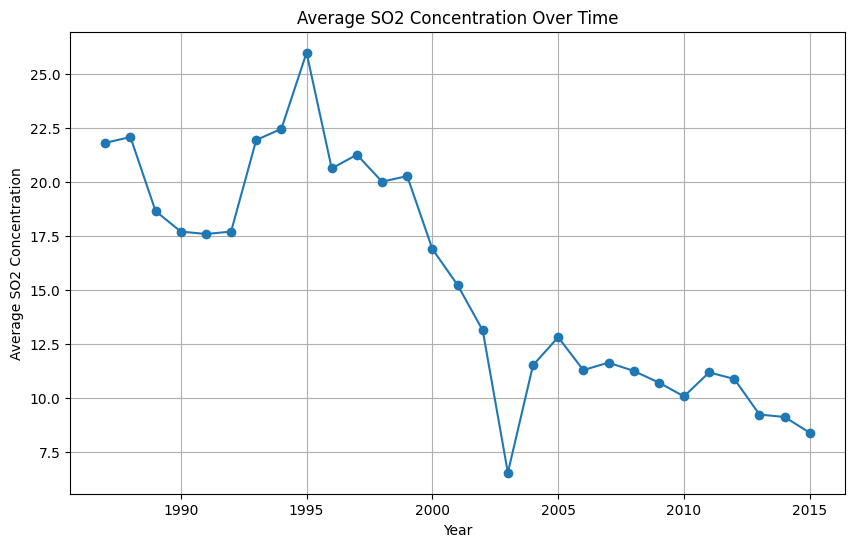

In [5]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
avg_so2_per_year_pandas = avg_so2_per_year.toPandas()

# Sort the Pandas DataFrame by year
avg_so2_per_year_pandas = avg_so2_per_year_pandas.sort_values(by='year')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_so2_per_year_pandas['year'], avg_so2_per_year_pandas['avg(so2)'], marker='o')
plt.title('Average SO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('Average SO2 Concentration')
plt.grid(True)
plt.show()


# Analyzing Average NO2 Concentration Over Time

In [6]:
from pyspark.sql.functions import year, col

# Convert 'no2' column to numerical type
df_with_year_no2 = df.withColumn("year", year(col("date"))) \
                      .withColumn("no2", col("no2").cast("float"))

# Group by year and calculate the average NO2 concentration
avg_no2_per_year = df_with_year_no2.groupBy("year").agg({"no2": "avg"})

# Sort the DataFrame by year in ascending order
sorted_avg_no2_per_year = avg_no2_per_year.orderBy("year")

# Show the sorted DataFrame
sorted_avg_no2_per_year.show()


+----+------------------+
|year|          avg(no2)|
+----+------------------+
|NULL|              22.0|
|1987|30.584545396674763|
|1988|30.606439402496274|
|1989|29.215815630826082|
|1990|25.714481812678713|
|1991|25.986804675469887|
|1992| 30.70205831471479|
|1993| 30.22762870702128|
|1994|31.764828516078943|
|1995| 33.07806643906677|
|1996| 26.50331755162949|
|1997|28.093304541661983|
|1998|27.252314541237485|
|1999|28.404222968663717|
|2000|29.006001061793025|
|2001| 28.69994952712362|
|2002|27.131232261431727|
|2003| 21.49914821124361|
|2004|  28.0458437499995|
|2005|28.500494903343327|
+----+------------------+
only showing top 20 rows



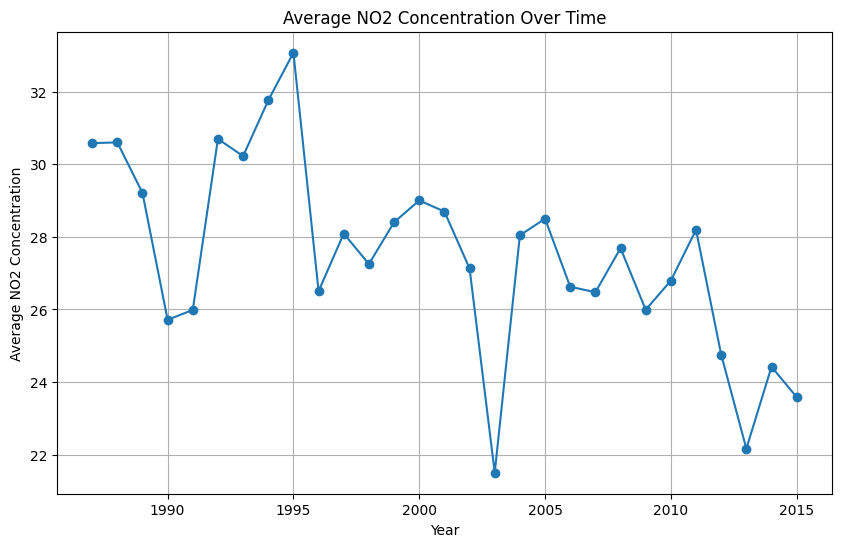

In [7]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
avg_no2_per_year_pandas = avg_no2_per_year.toPandas()

# Sort the Pandas DataFrame by year
avg_no2_per_year_pandas = avg_no2_per_year_pandas.sort_values(by='year')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_no2_per_year_pandas['year'], avg_no2_per_year_pandas['avg(no2)'], marker='o')
plt.title('Average NO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('Average NO2 Concentration')
plt.grid(True)
plt.show()


# Analyzing Average SO2 Concentration Across Indian States

In [8]:
from pyspark.sql.functions import col

# Convert 'so2' column to numerical type
df_with_state_so2 = df.withColumn("so2", col("so2").cast("float"))

# Group by state and calculate the average SO2 concentration
avg_so2_per_state = df_with_state_so2.groupBy("state").agg({"so2": "avg"})

# Sort the DataFrame by average SO2 concentration in descending order
sorted_avg_so2_per_state = avg_so2_per_state.orderBy(col("avg(so2)").desc())

# Show the sorted DataFrame
sorted_avg_so2_per_state.show()


+--------------------+------------------+
|               state|          avg(so2)|
+--------------------+------------------+
|         Uttaranchal| 24.69773585481464|
|         Uttarakhand|24.372957176868667|
|           Jharkhand|23.485793502432667|
|              Sikkim|19.799999237060547|
|               Bihar|19.381476262504638|
|         Maharashtra|17.366863001066815|
|             Gujarat|16.656342665415362|
|             Haryana| 14.06495699315893|
|        Chhattisgarh|12.846609351416697|
|         West Bengal|12.608765600450694|
|       Uttar Pradesh|12.528499862668342|
|          Puducherry|11.970638741482741|
|      Madhya Pradesh|11.587409813909497|
|          Tamil Nadu|11.315134176057505|
|              Punjab| 10.62859814358437|
|           Karnataka|10.223098793866434|
|           Meghalaya| 8.955907852839397|
|Dadra & Nagar Haveli| 8.939586647743262|
|               Delhi| 8.737272731366444|
|         Daman & Diu| 8.192957754782311|
+--------------------+------------

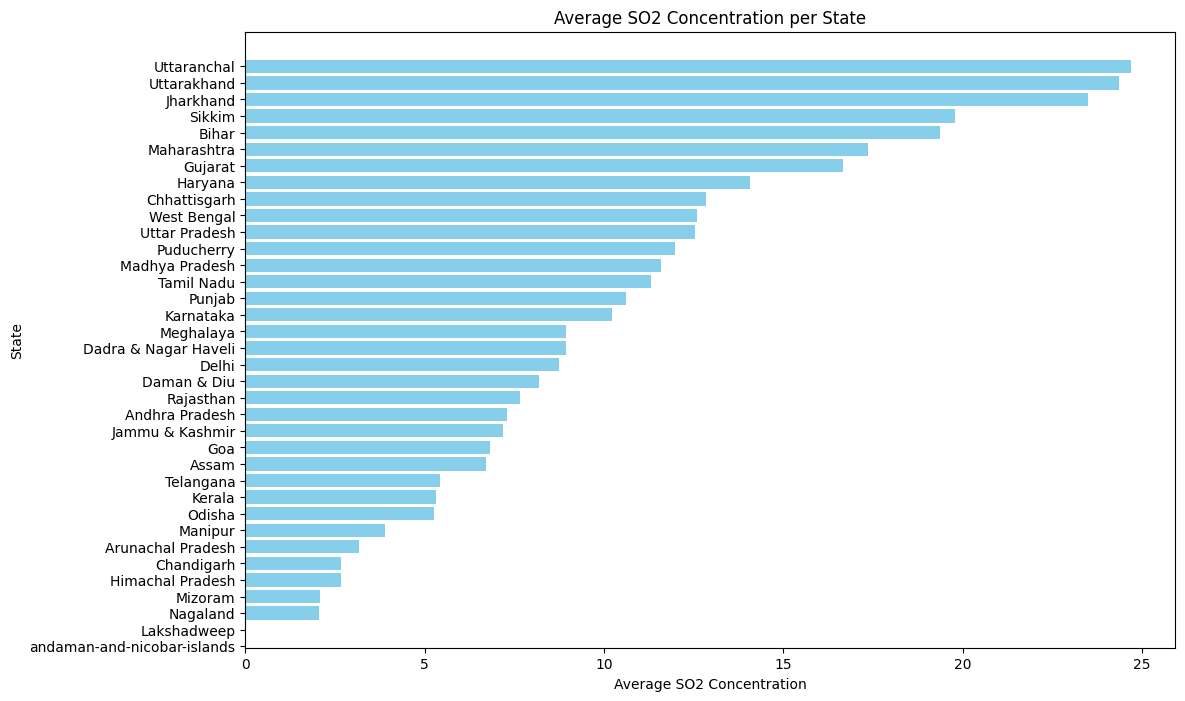

In [9]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
avg_so2_per_state_pandas = avg_so2_per_state.toPandas()

# Sort the Pandas DataFrame by average SO2 concentration in descending order
avg_so2_per_state_pandas = avg_so2_per_state_pandas.sort_values(by='avg(so2)', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(avg_so2_per_state_pandas['state'], avg_so2_per_state_pandas['avg(so2)'], color='skyblue')
plt.xlabel('Average SO2 Concentration')
plt.ylabel('State')
plt.title('Average SO2 Concentration per State')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()


# Analyzing Average NO2 Concentration Across Indian States

In [10]:
from pyspark.sql.functions import col

# Convert 'no2' column to numerical type
df_with_state_no2 = df.withColumn("no2", col("no2").cast("float"))

# Group by state and calculate the average NO2 concentration
avg_no2_per_state = df_with_state_no2.groupBy("state").agg({"no2": "avg"})

# Sort the DataFrame by average NO2 concentration in descending order
sorted_avg_no2_per_state = avg_no2_per_state.orderBy(col("avg(no2)").desc())

# Show the sorted DataFrame
sorted_avg_no2_per_state.show()


+--------------+------------------+
|         state|          avg(no2)|
+--------------+------------------+
|   West Bengal|59.075731456493465|
|         Delhi| 53.48914699109586|
|     Jharkhand| 43.36634063622639|
|         Bihar| 36.57552511180373|
|   Maharashtra| 32.11537044823239|
|     Rajasthan|30.441008210725574|
|        Punjab| 28.08584599447385|
| Uttar Pradesh|27.610095250614034|
|   Uttaranchal|27.163018903192484|
|   Uttarakhand| 26.93809002978461|
|        Sikkim|26.799999237060547|
|  Chhattisgarh|24.815961301764144|
|       Gujarat|24.065630833599833|
|     Telangana| 23.86400508469653|
|       Haryana|23.428310646157783|
|     Karnataka|22.702836508411135|
|Andhra Pradesh| 21.70445055814219|
|    Tamil Nadu| 21.60120197385065|
|       Manipur|20.173684182919953|
|Madhya Pradesh|18.639596246818286|
+--------------+------------------+
only showing top 20 rows



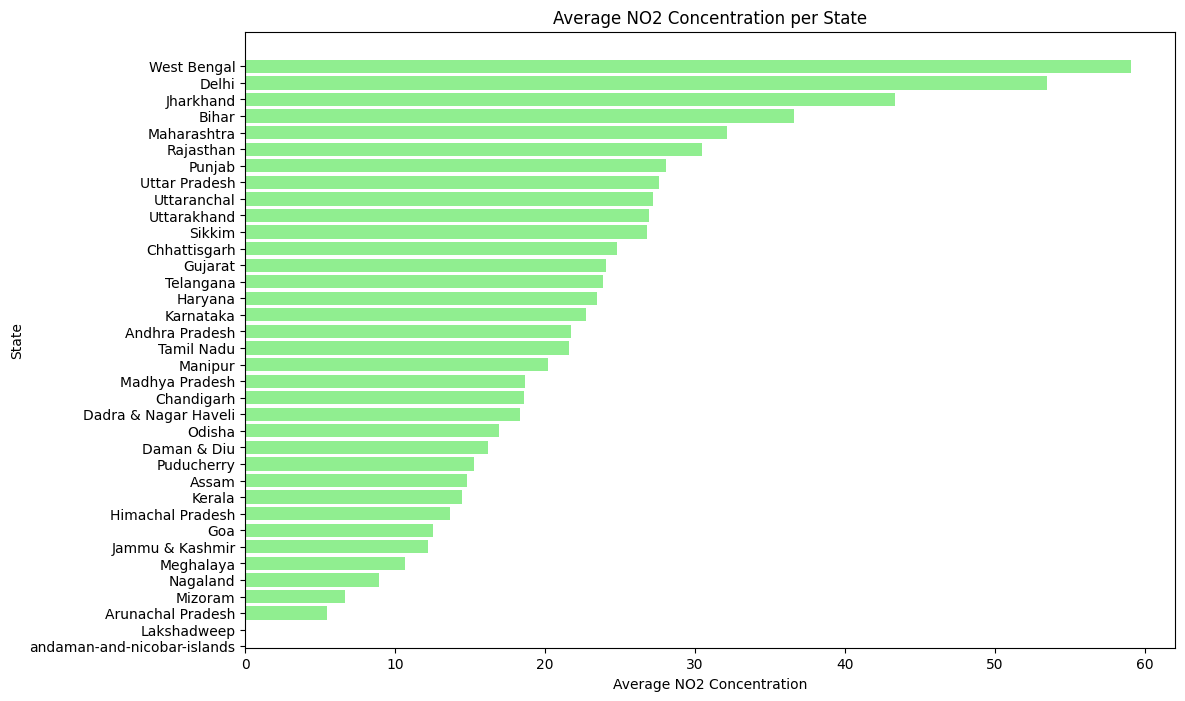

In [11]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
avg_no2_per_state_pandas = avg_no2_per_state.toPandas()

# Sort the Pandas DataFrame by average NO2 concentration in descending order
avg_no2_per_state_pandas = avg_no2_per_state_pandas.sort_values(by='avg(no2)', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(avg_no2_per_state_pandas['state'], avg_no2_per_state_pandas['avg(no2)'], color='lightgreen')
plt.xlabel('Average NO2 Concentration')
plt.ylabel('State')
plt.title('Average NO2 Concentration per State')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()


# Analyzing Average SO2 Concentration by Pollution Source Type

In [12]:
from pyspark.sql.functions import col

# Convert 'so2' column to numerical type
df_with_type_so2 = df.withColumn("so2", col("so2").cast("float"))

# Filter out rows with 'NA' values in the 'type' column
df_filtered = df_with_type_so2.filter(df_with_type_so2["type"] != "NA")

# Group by type and calculate the average SO2 concentration
avg_so2_per_type = df_filtered.groupBy("type").agg({"so2": "avg"})

# Show the DataFrame
avg_so2_per_type.show()


+--------------------+------------------+
|                type|          avg(so2)|
+--------------------+------------------+
|    Industrial Areas|13.765722947674599|
|         Residential|15.227777778550431|
|     Industrial Area|13.212287439513934|
|     Sensitive Areas| 7.477117815930051|
|          Industrial|27.130601067360633|
|Residential, Rura...| 9.218446749960986|
|Residential and o...|10.246096335867149|
|      Sensitive Area| 5.263544508812119|
|               RIRUO|10.912576687116564|
|           Sensitive|10.486184225303301|
+--------------------+------------------+



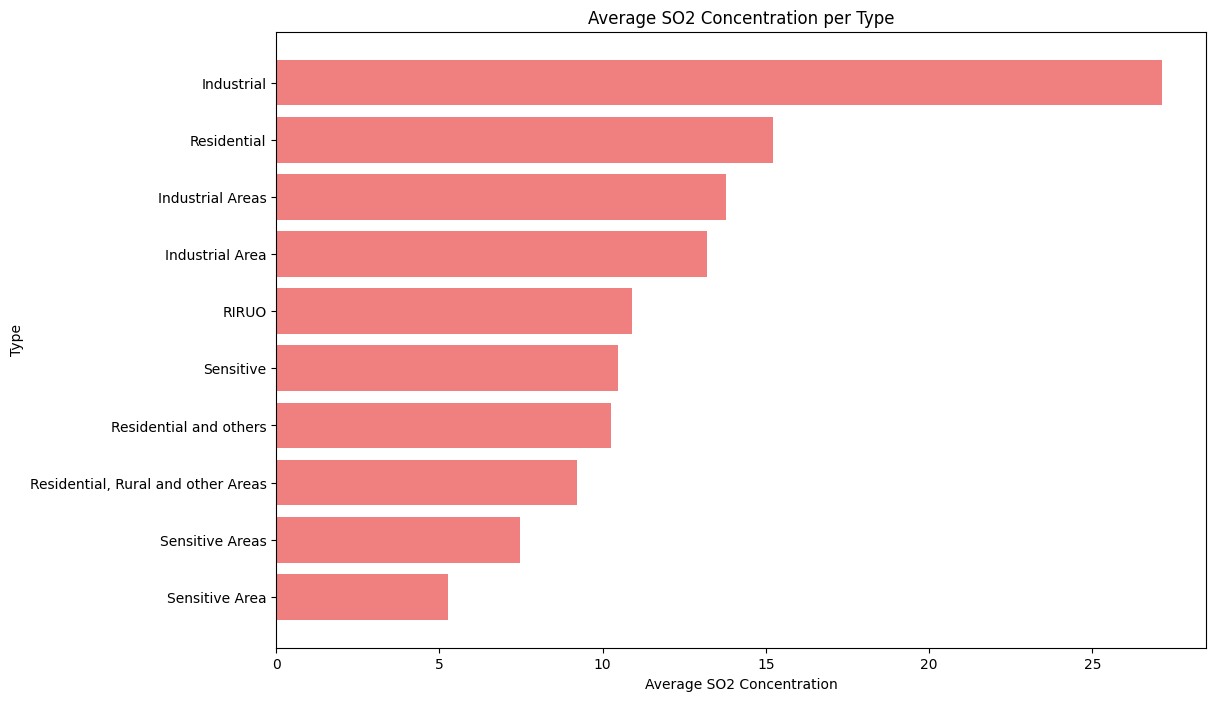

In [13]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
avg_so2_per_type_pandas = avg_so2_per_type.toPandas()

# Sort the Pandas DataFrame by average SO2 concentration in descending order
avg_so2_per_type_pandas = avg_so2_per_type_pandas.sort_values(by='avg(so2)', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(avg_so2_per_type_pandas['type'], avg_so2_per_type_pandas['avg(so2)'], color='lightcoral')
plt.xlabel('Average SO2 Concentration')
plt.ylabel('Type')
plt.title('Average SO2 Concentration per Type')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()


# Analyzing Average NO2 Concentration by Pollution Source Type

In [14]:
from pyspark.sql.functions import col

# Convert 'no2' column to numerical type
df_with_type_no2 = df.withColumn("no2", col("no2").cast("float"))

# Filter out rows with 'NA' values in the 'type' column
df_filtered_no2 = df_with_type_no2.filter(df_with_type_no2["type"] != "NA")

# Group by type and calculate the average NO2 concentration
avg_no2_per_type = df_filtered_no2.groupBy("type").agg({"no2": "avg"})

# Show the DataFrame
avg_no2_per_type.show()


+--------------------+------------------+
|                type|          avg(no2)|
+--------------------+------------------+
|    Industrial Areas| 29.99172684025098|
|         Residential|  19.4928571736174|
|     Industrial Area|  29.1711924586431|
|     Sensitive Areas|22.871587705858854|
|          Industrial|37.864766704294965|
|Residential, Rura...|23.410190313693487|
|Residential and o...| 25.38933156449053|
|      Sensitive Area| 18.06023982313901|
|               RIRUO|31.779907975460123|
|           Sensitive| 24.61872341074842|
+--------------------+------------------+



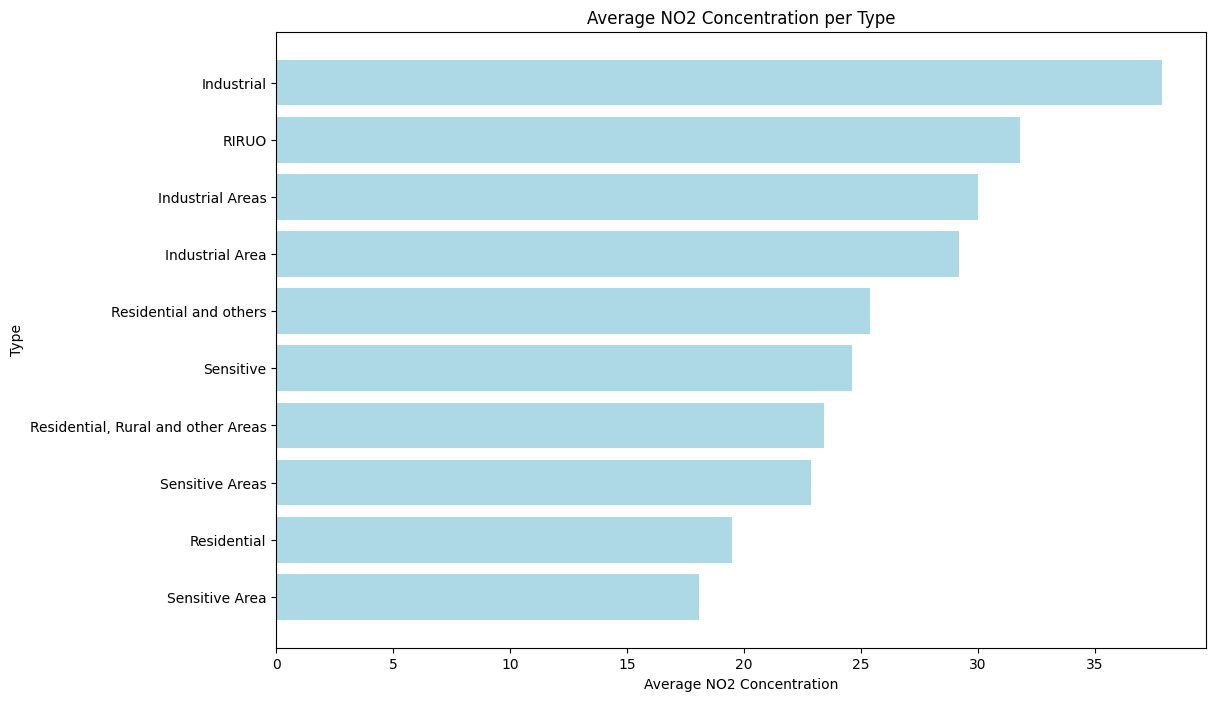

In [15]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
avg_no2_per_type_pandas = avg_no2_per_type.toPandas()

# Sort the Pandas DataFrame by average NO2 concentration in descending order
avg_no2_per_type_pandas = avg_no2_per_type_pandas.sort_values(by='avg(no2)', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(avg_no2_per_type_pandas['type'], avg_no2_per_type_pandas['avg(no2)'], color='lightblue')
plt.xlabel('Average NO2 Concentration')
plt.ylabel('Type')
plt.title('Average NO2 Concentration per Type')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()


# # Analyzing Average pm2_5 Concentration Across Indian States

In [16]:
from pyspark.sql.functions import col

# Convert 'pm2_5' column to numerical type
df_with_state_pm25 = df.withColumn("pm2_5", col("pm2_5").cast("float"))

# Group by state and calculate the average PM2.5 concentration
avg_pm25_per_state = df_with_state_pm25.groupBy("state").agg({"pm2_5": "avg"})

# Filter out rows with non-null average PM2.5 values
avg_pm25_per_state_filtered = avg_pm25_per_state.filter(col("avg(pm2_5)").isNotNull())

# Show the DataFrame
avg_pm25_per_state_filtered.show()


+--------------------+------------------+
|               state|        avg(pm2_5)|
+--------------------+------------------+
|         Daman & Diu|27.886363636363637|
|                 Goa| 18.85561151024249|
|             Gujarat| 30.72969596001666|
|               Delhi| 95.11320754716981|
|Dadra & Nagar Haveli|30.511627906976745|
|      Madhya Pradesh| 65.06456451508046|
|              Odisha| 42.20408895265423|
|          Tamil Nadu|29.550440534095934|
|           Telangana| 43.96892655367232|
|         West Bengal|         64.890625|
+--------------------+------------------+



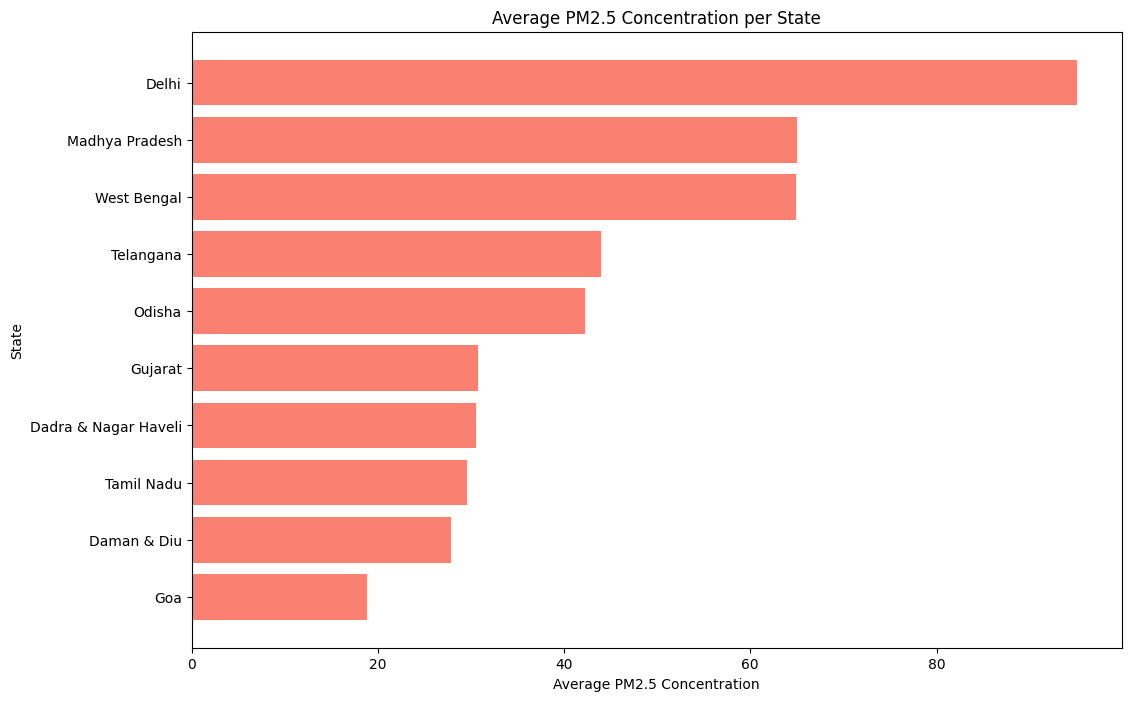

In [17]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
avg_pm25_per_state_pandas = avg_pm25_per_state_filtered.toPandas()

# Sort the Pandas DataFrame by average PM2.5 concentration in descending order
avg_pm25_per_state_pandas = avg_pm25_per_state_pandas.sort_values(by='avg(pm2_5)', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(avg_pm25_per_state_pandas['state'], avg_pm25_per_state_pandas['avg(pm2_5)'], color='salmon')
plt.xlabel('Average PM2.5 Concentration')
plt.ylabel('State')
plt.title('Average PM2.5 Concentration per State')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()


# Analyzing Average NO2 Concentration by Pollution Source Type

In [18]:
from pyspark.sql.functions import col

# Convert 'pm2_5' column to numerical type
df_with_type_pm25 = df.withColumn("pm2_5", col("pm2_5").cast("float"))

# Group by type and calculate the average PM2.5 concentration
avg_pm25_per_type = df_with_type_pm25.groupBy("type").agg({"pm2_5": "avg"})

# Filter out rows with non-null average PM2.5 values
avg_pm25_per_type_filtered = avg_pm25_per_type.filter(col("avg(pm2_5)").isNotNull())

# Show the DataFrame
avg_pm25_per_type_filtered.show()


+--------------------+-----------------+
|                type|       avg(pm2_5)|
+--------------------+-----------------+
|     Industrial Area|44.10698739933394|
|Residential, Rura...|39.65274991596318|
|               RIRUO|37.81629116117851|
+--------------------+-----------------+



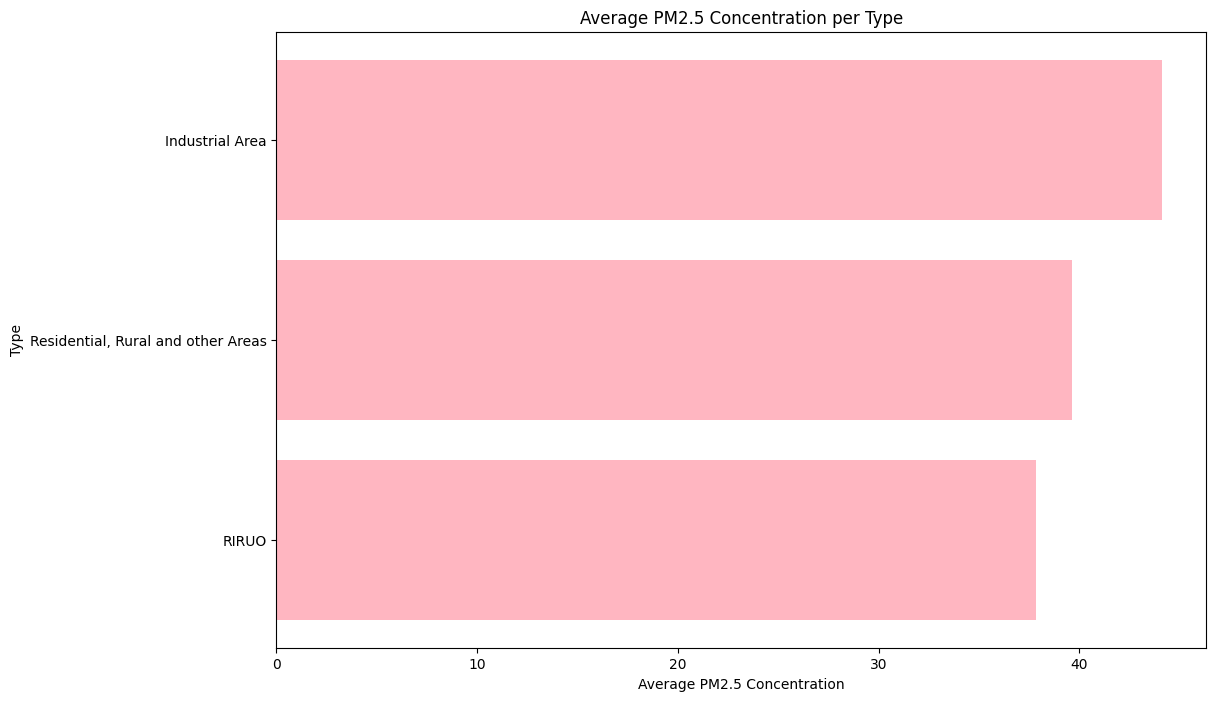

In [19]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
avg_pm25_per_type_pandas = avg_pm25_per_type_filtered.toPandas()

# Sort the Pandas DataFrame by average PM2.5 concentration in descending order
avg_pm25_per_type_pandas = avg_pm25_per_type_pandas.sort_values(by='avg(pm2_5)', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(avg_pm25_per_type_pandas['type'], avg_pm25_per_type_pandas['avg(pm2_5)'], color='lightpink')
plt.xlabel('Average PM2.5 Concentration')
plt.ylabel('Type')
plt.title('Average PM2.5 Concentration per Type')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()
